<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/vpopv/PycharmProjects/ML_VVSU2023/student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [2]:
import pandas as pd
import numpy as np

def create_holes(dataframe, column_name, hole_percentage = 10):
    """
    Создает "дыры" в указанной колонке заданного DataFrame.

    Parameters:
        dataframe (pd.DataFrame): Исходный DataFrame.
        column_name (str): Имя колонки, в которой нужно создать "дыры".
        hole_percentage (float): Процент дырявости, который указывает, какую часть данных следует заменить на NaN.

    Returns:
        pd.DataFrame: DataFrame с "дырами" в указанной колонке.
    """
    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


# Example
# df = pd.read_csv('path/to/file')
# df = create_holes(df, 'column')

In [3]:
work_df = create_holes(df,"Medu")
work_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,NaN,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2.0,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3.0,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,NaN,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3.0,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
test = work_df.isnull()
test.sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu          64
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

In [5]:
df_cleaned = work_df.dropna()

df_cleaned

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,0,14,14,14
5,GP,M,16,U,LE3,T,4.0,3,services,other,...,5,4,2,1,2,5,6,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,MS,F,18,R,GT3,T,4.0,4,teacher,at_home,...,4,4,3,2,2,5,4,7,9,10
644,MS,F,19,R,GT3,T,2.0,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3.0,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
647,MS,M,17,U,LE3,T,3.0,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
df_fileed_median = work_df.fillna(work_df.median())
df_fileed_median

C:\Users\vpopv\AppData\Local\Temp\ipykernel_17400\3052197744.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fileed_median = work_df.fillna(work_df.median())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,2.0,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2.0,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3.0,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,2.0,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3.0,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
df_filled_mean = work_df.fillna(work_df.mean())

df_filled_mean

C:\Users\vpopv\AppData\Local\Temp\ipykernel_17400\1499569259.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_mean = work_df.fillna(work_df.mean())


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.000000,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1.000000,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1.000000,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4.000000,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,2.497436,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2.000000,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3.000000,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,2.497436,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3.000000,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [8]:
df_filled_mode = work_df.fillna(work_df["Medu"].mode()[0])

df_filled_mode

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,2.0,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2.0,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3.0,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,2.0,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3.0,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [9]:
df_interpolated = work_df.interpolate()

df_interpolated

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1.0,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1.0,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4.0,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,4.0,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2.0,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3.0,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,3.0,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3.0,1,services,services,...,2,4,5,3,4,2,6,10,10,10


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [10]:
from statistics import median, mean
from sklearn.cluster import DBSCAN

class Outline:
  def __init__(self, df):
    self.df = df
  def detec_otline_by_showene(self, column_name):
        res = []
        n = self.df[column_name].count()
        mean = self.df[column_name].mean()
        std = self.df[column_name].std()
        for index, value in self.df.iterrows():
            if math.erfc((abs(value[column_name] - mean)) / std) < 1 / (2 * n):
                res.append((index, value[column_name]))
            else:
                n -= 1
        return res

  def detect_outline_by_quantile(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        minimum = Q1 - 1.5 * (Q3 - Q1)
        maximum = Q3 + 1.5 * (Q3 - Q1)
        outliers = self.df[(self.df[column_name] < minimum) | (self.df[column_name] > maximum)]
        return outliers

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result
  def detect_outline_by_mean_std(self,column_name,coef):
        mean = self.df[column_name].mean()
        median = self.df[column_name].median()
        std = self.df[column_name].std()
        n = self.df[column_name].count()
        lower_bound = mean - coef  * std
        upper_bound = mean + coef * std
        outliners = self.df[(self.df[column_name] >= lower_bound) & (self.df[column_name]<=upper_bound)]
        return outliners
  def detect_outliner_by_DBSCAN(self, col1, col2, eps, min_samples=2):
        data = self.df[[col1, col2]].to_numpy()

        db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        labels = db.labels_

        # Вычисление количества элементов в каждом кластере
        unique, counts = np.unique(labels, return_counts=True)
        clusters_counts = dict(zip(unique, counts))
        # Поиск кластеров с количеством элементов <= 2
        small_clusters = [cluster for cluster, count in clusters_counts.items() if count <= 2]

        # Возвращение индексов строк для этих кластеров
        outlier_indices = self.df.index[np.isin(labels, small_clusters)].tolist()

        return outlier_indices

In [11]:
test = df
test["Medu"].describe()

count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21d1e4dfe50>,
 'caps': [<matplotlib.lines.Line2D at 0x21d1e6543d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d1e4dfbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d1e654910>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d1e654bb0>],
 'means': []}

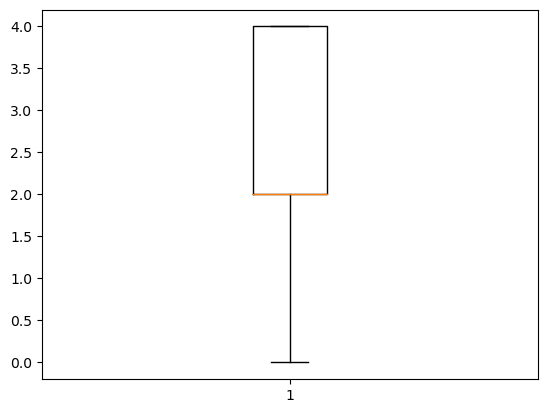

In [12]:
plt.boxplot(test["Medu"])

In [13]:
test.loc[0:100,"Medu"] = 100

In [14]:
test["Medu"].describe()

count    649.000000
mean      17.596302
std       35.419014
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max      100.000000
Name: Medu, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21d1f714a60>,
 'caps': [<matplotlib.lines.Line2D at 0x21d1f714e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d1f7147c0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d1f7153c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d1f715660>],
 'means': []}

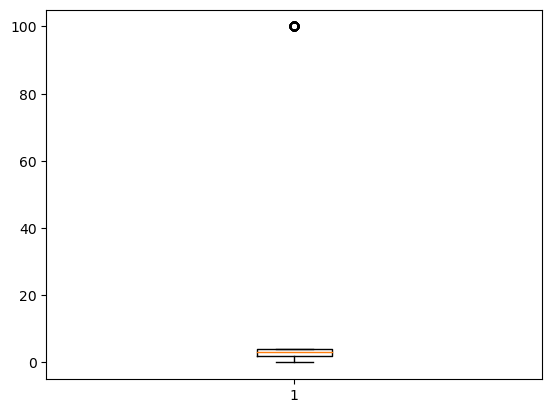

In [15]:
plt.boxplot(test["Medu"])

In [16]:
detect_outliners = Outline(test)

In [17]:
outliners = detect_outliners.detect_outline_by_mean_std("Medu",1.5)


In [18]:
outliners["Medu"].describe()

count    548.000000
mean       2.408759
std        1.123489
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Medu, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21d1f767d60>,
 'caps': [<matplotlib.lines.Line2D at 0x21d1f7a01c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d1f767ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d1f7a0700>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d1f7a09a0>],
 'means': []}

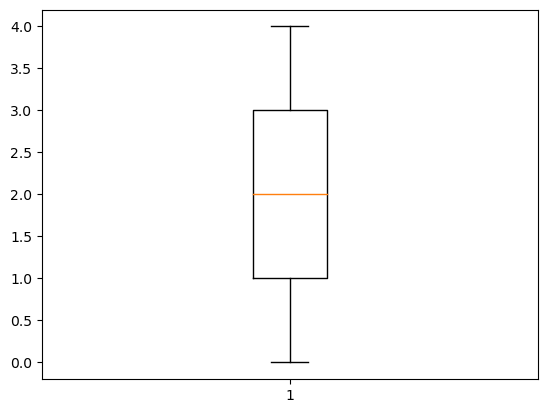

In [19]:
plt.boxplot(outliners["Medu"])

С помощью поиска выбросов методом среднего и отклонения, я получил датафрейм без выбросов, в статистике все стало чисто, так как первые 100 значений были убраны, и остались нормальные значения, на графике выбросы тоже пропали

In [20]:
outliners = detect_outliners.detect_outline_by_quantile("Medu")

In [21]:
outliners["Medu"].describe()

count    101.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: Medu, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21d1feece50>,
 'caps': [<matplotlib.lines.Line2D at 0x21d1feed390>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d1feecbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d1feed8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d1feedb70>],
 'means': []}

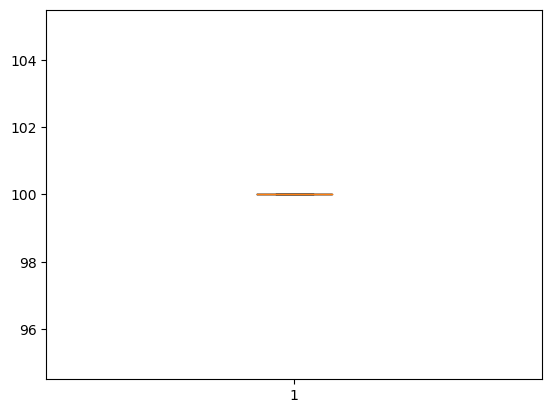

In [22]:
plt.boxplot(outliners["Medu"])

С помощью квартилей я получил сами быбросы, без остальных данных, и мы видем что были удалены первые 100 значений, которые были равны 100. Теперь мы можем убрать их из нашего датафрейма, и он станет чистым.

**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [23]:
test = pd.concat((df, df.loc[0:100]))

In [24]:
test["Medu"].describe()

count    750.000000
mean      28.693333
std       43.332315
min        0.000000
25%        2.000000
50%        3.000000
75%      100.000000
max      100.000000
Name: Medu, dtype: float64

In [25]:
test = test.drop_duplicates()
test["Medu"].describe()

count    649.000000
mean      17.596302
std       35.419014
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max      100.000000
Name: Medu, dtype: float64

## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [27]:
num_features = df.select_dtypes(include=['float64','int64']).columns
num_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [28]:
for col in num_features:
    print(df[col].unique())

[18 17 15 16 19 22 20 21]
[100   4   3   2   1   0]
[4 1 2 3 0]
[2 1 3 4]
[2 3 1 4]
[0 3 1 2]
[4 5 3 1 2]
[3 2 4 1 5]
[4 3 2 1 5]
[1 2 5 3 4]
[1 3 2 4 5]
[3 5 1 2 4]
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]


In [29]:
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])
for col in num_features:
    print(df_minmax_scaled[col].unique())

[0.42857143 0.28571429 0.         0.14285714 0.57142857 1.
 0.71428571 0.85714286]
[1.   0.04 0.03 0.02 0.01 0.  ]
[1.   0.25 0.5  0.75 0.  ]
[0.33333333 0.         0.66666667 1.        ]
[0.33333333 0.66666667 0.         1.        ]
[0.         1.         0.33333333 0.66666667]
[0.75 1.   0.5  0.   0.25]
[0.5  0.25 0.75 0.   1.  ]
[0.75 0.5  0.25 0.   1.  ]
[0.   0.25 1.   0.5  0.75]
[0.   0.5  0.25 0.75 1.  ]
[0.5  1.   0.   0.25 0.75]
[0.125   0.0625  0.1875  0.      0.3125  0.25    0.5     0.4375  0.03125
 0.375   0.75    0.6875  1.      0.9375  0.65625 0.46875 0.28125 0.5625
 0.8125  0.21875 0.34375 0.15625 0.40625 0.09375]
[0.         0.47368421 0.63157895 0.73684211 0.57894737 0.68421053
 0.52631579 0.78947368 0.89473684 0.42105263 0.84210526 0.94736842
 0.36842105 0.31578947 0.26315789 0.21052632 1.        ]
[0.57894737 0.68421053 0.73684211 0.63157895 0.84210526 0.89473684
 0.42105263 0.52631579 0.78947368 0.47368421 0.36842105 0.31578947
 0.94736842 1.         0.         0.26

In [30]:
df_standart_scaled = df.copy()
df_standart_scaled[num_features] = standard_scaler.fit_transform(df[num_features])
for col in num_features:
    print(df_standart_scaled[col].unique())

[ 1.03169516  0.21013668 -1.43298028 -0.6114218   1.85325364  4.31792908
  2.67481212  3.4963706 ]
[ 2.32833295 -0.38416623 -0.41242143 -0.44067663 -0.46893183 -0.49718703]
[ 1.54071544 -1.18883229 -0.27898305  0.63086619 -2.09868154]
[ 0.57671799 -0.76003192  1.91346791  3.25021782]
[ 0.08365295  1.29011438 -1.12280848  2.49657581]
[-0.37430512  4.686612    1.31266725  2.99963963]
[ 0.07260615  1.11974816 -0.97453586 -3.06881988 -2.02167787]
[-0.17164654 -1.12377133  0.78047826 -2.07589613  1.73260306]
[ 0.69378496 -0.15738033 -1.00854562 -1.85971092  1.54495025]
[-0.54355533  0.53855329  3.78487914  1.62066191  2.70277052]
[-0.99769466  0.56067799 -0.21850834  1.33986431  2.11905063]
[-0.3710422   1.01290255 -1.75498694 -1.06301457  0.32093018]
[ 0.07343336 -0.35786305  0.50472977 -0.78915946  1.36732259  0.93602618
  2.66121183  2.22991542 -0.57351125  1.79861901  4.38639747  3.95510106
  6.11158311  5.6802867   3.73945285  2.44556362  1.15167439  3.09250824
  4.81769388  0.72037798

In [31]:
df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled[num_features] = df_standart_scaled[num_features]

In [32]:
df_scaled

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,1.031695,U,GT3,A,2.328333,1.540715,at_home,teacher,...,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658
1,GP,F,0.210137,U,GT3,T,2.328333,-1.188832,at_home,other,...,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658
2,GP,F,-1.432980,U,LE3,T,2.328333,-1.188832,at_home,other,...,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116
3,GP,F,-1.432980,U,GT3,T,2.328333,-0.278983,health,services,...,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663
4,GP,F,-0.611422,U,GT3,T,2.328333,0.630866,other,other,...,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,1.853254,R,GT3,T,-0.440677,0.630866,services,other,...,1.119748,0.780478,-1.008546,-0.543555,-0.218508,1.012903,0.073433,-0.510025,-0.195820,-0.590431
645,MS,F,1.031695,U,LE3,T,-0.412421,-1.188832,teacher,services,...,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-1.754987,0.073433,1.312697,1.178093,1.268209
646,MS,F,1.031695,U,GT3,T,-0.468932,-1.188832,other,other,...,-3.068820,-2.075896,-1.859711,-0.543555,-0.997695,1.012903,0.504730,-0.145481,0.147659,-0.900204
647,MS,M,0.210137,U,LE3,T,-0.412421,-1.188832,services,services,...,-2.021678,0.780478,1.544950,1.620662,1.339864,-1.063015,0.504730,-0.510025,-0.539298,-0.590431


Масштабируйте категориальные признаки через OneHotEncoder

In [40]:
work_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [41]:
df = work_df

In [43]:
from sklearn.preprocessing import OneHotEncoder

df.school = df.school.astype("category")
df.sex = df.sex.astype("category")
df.address = df.address.astype("category")
df.Mjob = df.Mjob.astype("category")
df.Fjob = df.Fjob.astype("category")
category_cols = df.select_dtypes(include=['category']).columns
encoder = OneHotEncoder()

df_encoded = pd.get_dummies(df, columns=category_cols, drop_first=True)
encoded_features = encoder.fit_transform(df[category_cols])
encoded_columns = encoder.get_feature_names_out(category_cols)

encoded_columns

array(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher'], dtype=object)

In [44]:
df_encoded

,age,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,...,sex_M,address_U,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,18,GT3,A,4.0,4,course,mother,2,2,0,...,0,1,0,0,0,0,0,0,0,1
1,17,GT3,T,1.0,1,course,father,1,2,0,...,0,1,0,0,0,0,0,1,0,0
2,15,LE3,T,1.0,1,other,mother,1,2,0,...,0,1,0,0,0,0,0,1,0,0
3,15,GT3,T,4.0,2,home,mother,1,3,0,...,0,1,1,0,0,0,0,0,1,0
4,16,GT3,T,NaN,3,home,father,1,2,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,GT3,T,2.0,3,course,mother,1,3,1,...,0,0,0,0,1,0,0,1,0,0
645,18,LE3,T,3.0,1,course,mother,1,2,0,...,0,1,0,0,0,1,0,0,1,0
646,18,GT3,T,NaN,1,course,mother,2,2,0,...,0,1,0,1,0,0,0,1,0,0
647,17,LE3,T,3.0,1,course,mother,2,1,0,...,1,1,0,0,1,0,0,0,1,0


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [45]:
#Функция по расчету тут
import pandas as pd
import numpy as np
from scipy.stats import spearmanr


def corr_spearman(column_1, column_2):
  rho, p = spearmanr(df[column_1], df[column_2])
  return rho

In [50]:
#Пример использования тут и объяснение принципа работы

corr_spearman("age","absences")

0.12426049657983287

Есть 2 переменные(колонки), у нас это возраст и пропуски уроков
Для кажой переменной присвоим ранги, то есть значение которое показывает на сколько каждое значение больше или меньше других
Затем для каждой пары значений мы вычисляем разницу в рангах, и возводим её в квадрат
Суммируем все квадраты разниц
p = 1 - 6(сумма разницы)/ n(n**2 - 1)
по этой формуле получаем корреляцию
n - это количество наших пар значений

###Пример реализации

In [36]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [37]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [38]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])